# Sprint 2 Pascal

Empezad cargando un conjunto de datos ficticios de redes sociales en un DataFrame.
A continuación realizad consultas SQL básicas y avanzadas para explorar y comprender los datos.
Luego, aplicad transformaciones sobre el DataFrame para realizar análisis más profundos, comparando las diferencias con respecto al uso de RDDs en el Sprint anterior.
Además, utilizad GraphX para crear un grafo a partir de los datos de redes sociales y realizad operaciones básicas como calcular el número de conexiones o seguidores de las personas en la red.

Importar desde Drive

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
link = 'https://drive.google.com/open?id=1CY9oyf3YpmxjstaT3VIHOmHaewQXI0Ol'

In [5]:
fluff, id = link.split('=')
print (id)

1CY9oyf3YpmxjstaT3VIHOmHaewQXI0Ol


In [6]:
#descargamos contenido del fichero
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('telefonos_datos.csv')

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Analisis_Telefonos").getOrCreate()

Visualizamos el contenido del fichero csv con Pandas.

In [8]:
import pandas as pd
df = pd.read_csv('telefonos_datos.csv')
df.head()


,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


Explorando los datos con SQL Spark

In [9]:
#Cargar el daframe y listar los primeros registros
df = spark.read.csv('telefonos_datos.csv', header=True, inferSchema=True)
df.show()

+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|_c0|brand_name|          model_name|     os|popularity|best_price|lowest_price|highest_price|sellers_amount|screen_size|memory_size|battery_size|release_date|
+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|  0|   ALCATEL|1 1/8GB Bluish Bl...|Android|       422|    1690.0|      1529.0|       1819.0|            36|        5.0|        8.0|      2000.0|     10-2020|
|  1|   ALCATEL|1 5033D 1/16GB Vo...|Android|       323|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  2|   ALCATEL|1 5033D 1/16GB Vo...|Android|       299|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  3|   ALCATEL|1 5033D 1/16GB Vo...|And

In [10]:
# Mostramos el DataFrame
df.show()

+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|_c0|brand_name|          model_name|     os|popularity|best_price|lowest_price|highest_price|sellers_amount|screen_size|memory_size|battery_size|release_date|
+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|  0|   ALCATEL|1 1/8GB Bluish Bl...|Android|       422|    1690.0|      1529.0|       1819.0|            36|        5.0|        8.0|      2000.0|     10-2020|
|  1|   ALCATEL|1 5033D 1/16GB Vo...|Android|       323|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  2|   ALCATEL|1 5033D 1/16GB Vo...|Android|       299|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  3|   ALCATEL|1 5033D 1/16GB Vo...|And

In [11]:
# Mostramos el Esquema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- model_name: string (nullable = true)
 |-- os: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- best_price: double (nullable = true)
 |-- lowest_price: double (nullable = true)
 |-- highest_price: double (nullable = true)
 |-- sellers_amount: integer (nullable = true)
 |-- screen_size: double (nullable = true)
 |-- memory_size: double (nullable = true)
 |-- battery_size: double (nullable = true)
 |-- release_date: string (nullable = true)



Consultas SQL básicas y avanzadas

In [12]:
from pyspark.sql.functions import *
#Top 5 teléfonos más populares
top_5_contactos_populares= df.select("brand_name", "model_name", "os", "popularity")\
.orderBy(col("popularity").desc()).limit(5)
display(top_5_contactos_populares.show(5))

+----------+--------------------+-------+----------+
|brand_name|          model_name|     os|popularity|
+----------+--------------------+-------+----------+
|     Apple|iPhone 12 Pro 128...|    iOS|      1224|
|    Google|Pixel 4a 6/128GB ...|Android|      1223|
|    Xiaomi|Poco X3 NFC 6/128...|Android|      1222|
|     Apple|iPhone 11 64GB Bl...|    iOS|      1221|
|   Samsung|Galaxy M51 6/128G...|Android|      1220|
+----------+--------------------+-------+----------+



None

In [13]:
#romedio de precios por sistema operativo

In [14]:
consulta_promedios_por_os = df.groupBy("os") \
    .agg(
        round(avg("best_price"), 2).alias("avg_best_price"),
        round(avg("highest_price"), 2).alias("avg_high_price")
    )
display(consulta_promedios_por_os.show())

+------------+--------------+--------------+
|          os|avg_best_price|avg_high_price|
+------------+--------------+--------------+
|       KAIOS|        1036.0|        1059.0|
|    OxygenOS|       6612.67|       8365.67|
|         iOS|      20869.61|      26588.09|
|        NULL|        758.23|        886.14|
|        EMUI|       31656.0|       33089.0|
|WindowsPhone|        2600.0|          NULL|
|     Android|       8009.96|        9718.1|
+------------+--------------+--------------+



None

In [15]:
#Modelos lanzados después de 2020 y con batería > 3000 mAh
consulta_bateria_lanzamiento = df.filter(
    (col("battery_size") > 3000) &
    (col("release_date").contains("202"))
).select("brand_name", "model_name", "battery_size", "release_date")
display(consulta_bateria_lanzamiento.show(5))

+----------+--------------------+------------+------------+
|brand_name|          model_name|battery_size|release_date|
+----------+--------------------+------------+------------+
|     Honor|10 lite 3/128GB Blue|      3400.0|      1-2021|
|     Meizu|16X 6/128GB Dual ...|      3100.0|      3-2020|
|     Meizu|16Xs 6/128GB Pear...|      4000.0|     11-2020|
|   ALCATEL|1SE 3/32GB Power ...|      4000.0|     10-2020|
|   ALCATEL|1SE 4/128GB Agate...|      4000.0|     10-2020|
+----------+--------------------+------------+------------+
only showing top 5 rows



None

In [16]:
#Diferencia significativa entre best_price y lowest_price
consulta_diferencia_precio = df.withColumn("diferencia", col("best_price") - col("lowest_price")) \
                               .filter(col("diferencia") > 300) \
                               .select("brand_name", "model_name", "best_price", "lowest_price", "diferencia") \
                               .orderBy(col("diferencia").desc())

display(consulta_diferencia_precio.show(5))


+----------+--------------------+----------+------------+----------+
|brand_name|          model_name|best_price|lowest_price|diferencia|
+----------+--------------------+----------+------------+----------+
|   Samsung|Galaxy Note20 Ult...|   39524.0|     28381.0|   11143.0|
|   Samsung|Galaxy Z Flip SM-...|   35015.0|     24588.0|   10427.0|
|     Apple|iPhone 11 Pro Max...|   38447.0|     28050.0|   10397.0|
|   Samsung|Galaxy Fold 12/25...|   55338.0|     45799.0|    9539.0|
|     Apple|iPhone 7 Plus 256...|   16392.0|      7447.0|    8945.0|
+----------+--------------------+----------+------------+----------+
only showing top 5 rows



None

In [17]:
#Relación batería por pulgada de pantalla
consulta_relacion_pantalla = df.withColumn("relacion_pantalla", col("battery_size") / col("screen_size")) \
                               .select("brand_name", "model_name", "battery_size", "screen_size", "relacion_pantalla") \
                               .orderBy(col("relacion_pantalla").desc())

display(consulta_relacion_pantalla.show(5))


+------------+--------------------+------------+-----------+------------------+
|  brand_name|          model_name|battery_size|screen_size| relacion_pantalla|
+------------+--------------------+------------+-----------+------------------+
|        Land|Rover Tank T3 KUH...|     15800.0|        2.4| 6583.333333333334|
|       MAFAM|           SUN6 Blue|     18800.0|        3.0| 6266.666666666667|
|      Rezone|    A281 Force Black|      6000.0|        2.8| 2142.857142857143|
|   Blackview| BV9100 4/64GB Black|     13000.0|        6.3|2063.4920634920636|
|Sigma mobile|X-treme DZ68 Blac...|      4500.0|        2.4|            1875.0|
+------------+--------------------+------------+-----------+------------------+
only showing top 5 rows



None

In [18]:
#Rellenar valores nulos de memory_size con la mediana
mediana_memory_size = df.approxQuantile("memory_size", [0.5], 0)[0]
df = df.withColumn("memory_size", when(col("memory_size").isNull(), mediana_memory_size).otherwise(col("memory_size")))
display(df.show(5))

+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|_c0|brand_name|          model_name|     os|popularity|best_price|lowest_price|highest_price|sellers_amount|screen_size|memory_size|battery_size|release_date|
+---+----------+--------------------+-------+----------+----------+------------+-------------+--------------+-----------+-----------+------------+------------+
|  0|   ALCATEL|1 1/8GB Bluish Bl...|Android|       422|    1690.0|      1529.0|       1819.0|            36|        5.0|        8.0|      2000.0|     10-2020|
|  1|   ALCATEL|1 5033D 1/16GB Vo...|Android|       323|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  2|   ALCATEL|1 5033D 1/16GB Vo...|Android|       299|    1803.0|      1659.0|       2489.0|            36|        5.0|       16.0|      2000.0|      9-2020|
|  3|   ALCATEL|1 5033D 1/16GB Vo...|And

None

Grafo con GraphFrames

In [19]:
pip install graphframes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.1 MB/s eta 0:00:00


In [20]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GraphFramesExample") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.3-s_2.12") \
    .getOrCreate()

In [21]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from graphframes import GraphFrame

# Create SparkSession with GraphFrames package
spark = SparkSession.builder \
    .appName("GraphFramesExample") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.0-s_2.12") \
    .getOrCreate()

vertices = df.select(col("brand_name").alias("id"), col("model_name").alias("name"))
edges = df.select(col("brand_name").alias("src"), col("model_name").alias("dst"))

grafo = GraphFrame(vertices, edges)

in_degrees = grafo.inDegrees
triangulos = grafo.triangleCount()
caminos = grafo.find("(a)-[e]->(b); (b)-[e2]->(c)")

display(in_degrees.show())
display(triangulos.show())
display(caminos.show())

/usr/local/lib/python3.11/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


Py4JJavaError: An error occurred while calling o197.loadClass.
: java.lang.ClassNotFoundException: org.graphframes.GraphFramePythonAPI
	at java.base/java.net.URLClassLoader.findClass(URLClassLoader.java:476)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:594)
	at java.base/java.lang.ClassLoader.loadClass(ClassLoader.java:527)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [ ]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark
!pip install -q graphframes


In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("GraphFrames in Colab") \
    .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.3-s_2.12") \
    .getOrCreate()


In [ ]:
from graphframes import GraphFrame

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from graphframes import GraphFrame

try:
    spark
except NameError:
    spark = SparkSession.builder \
        .appName("GraphFrames in Colab") \
        .config("spark.jars.packages", "graphframes:graphframes:0.8.2-spark3.3-s_2.12") \
        .getOrCreate()


# Crear vértices: nodos únicos por modelo
vertices = df.select(
    col("model_name").alias("id"),
    col("brand_name"),
    col("os"),
    col("release_date")
).dropDuplicates(["id"])

# Crear aristas: modelos distintos lanzados en la misma fecha
edges = df.alias("a").join(df.alias("b"),
    (col("a.release_date") == col("b.release_date")) &
    (col("a.model_name") != col("b.model_name"))
).select(
    col("a.model_name").alias("src"),
    col("b.model_name").alias("dst"),
    col("a.release_date")
).dropDuplicates(["src", "dst"])

g = GraphFrame(vertices, edges)

# Operaciones de grafo
print("Grado de entrada (inDegrees):")
g.inDegrees.show()

print("Conteo de triángulos (triangleCount):")
g.triangleCount().show()

print("Caminos de 2 saltos (find):")
g.find("(a)-[e]->(b); (b)-[e2]->(c)").show()

# Sprint 3

**En este sprint, os sumergiréis en el mundo del machine learning y el procesamiento en tiempo real utilizando MLlib y Spark Streaming en Apache Spark.**



1. Empezad entrenando un modelo de regresión logística o clasificación utilizando MLlib con un conjunto de datos relacionados con eventos sísmicos obtenidos de fuentes como Kaggle o generados por una IA.

2. Luego, evaluad el modelo utilizando métricas como precisión, recall y F1 score para medir su rendimiento.

3. A continuación, configurad un pipeline de streaming para leer datos en tiempo real desde una fuente simulada.

4. Posteriormente, avanzad integrando el modelo entrenado en el pipeline para realizar predicciones en tiempo real sobre la probabilidad de ocurrencia de un posible seísmo en una zona concreta.

5. Por último, de forma opcional podéis crear visualizaciones para monitorear las predicciones y datos en tiempo real.

Importar desde kaggle

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

In [ ]:
!kaggle datasets download -d maykogob/terremotos

In [ ]:
!unzip terremotos.zip

** MLlib + Spark Streaming para predicción de seísmos**

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.streaming import StreamingContext
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType

In [ ]:
# Cargar el DataFrame y listar los primeros registros
columnas = [
    "Fecha", "Tiempo", "Latitud", "Longitud", "Type", "Profundidad",
    "Depth_Error", "Profundidad_Estaciones_Sismicas", "Magnitud", "Tipo_Magnitud",
    "Magnitude_Error", "Magnitud_Estaciones_Sismicas", "Azimuthal_Gap",
    "Distancia_Horizontal", "Horizontal_Error", "RMS",
    "ID", "Source", "Ubicacion_Origen", "Magnitude_Source", "Status"
]

df = spark.read.csv('terremotos.csv', header=False, sep=';', inferSchema=True)

# Asignar nombres a las columnas
df = df.toDF(*columnas)

df.show(5)


**1. Entrenamiento del modelo de clasificación con MLlib**

In [ ]:
# Crear columna de clasificación binaria: peligroso si magnitud >= 6.0
df = df.withColumn("label", (col("Magnitud") >= 6.0).cast("integer"))

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Selección de columnas numéricas
feature_cols = ["Latitud", "Longitud", "Profundidad", "Magnitud", "Azimuthal_Gap", "RMS"]

df = df.fillna(0, subset=feature_cols)

Vector Assembler

In [ ]:
# Ensamblar en vector de características
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_ml = assembler.transform(df).select("features", "label")
df_ml.show(10)

In [ ]:
train_data, test_data = df_ml.randomSplit([0.8, 0.2], seed=42)
print(f"Hay {train_data.cache().count()} filas en el conjunto de entrenamiento y {test_data.cache().count()} en el conjunto de prueba.")

Regresion Lineal

In [ ]:
lr = LogisticRegression(featuresCol="features", labelCol="label")
model = lr.fit(train_data)

**2. Evaluación del modelo**

In [ ]:
predictions = model.transform(test_data)
predictions.show(5)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluador binario para AUC y ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Evaluadores múltiples para métricas estándar
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="precisionByLabel")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="recallByLabel")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Calcular métricas
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1 = f1_evaluator.evaluate(predictions)
accuracy = accuracy_evaluator.evaluate(predictions)
auc = binary_evaluator.evaluate(predictions)

print(f" Precisión: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" Accuracy: {accuracy:.4f}")
print(f" Área bajo la curva (AUC - ROC): {auc:.4f}")


Dibujar la Curva ROC en Matplotlib

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Convertir los resultados de predicción a Pandas DataFrame
preds_pd = predictions.select("label", "probability").toPandas()

# Extraer la probabilidad de la clase 1 (probability es un DenseVector)
y_true = preds_pd["label"]
y_scores = preds_pd["probability"].apply(lambda x: float(x[1]))

# Calcular puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Dibujar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo de Clasificación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**3. Configuración de Spark Streaming**

** Crear Spark Session y contexto de streaming**

In [ ]:
spark = SparkSession.builder \
    .appName("SeismicPredictionPipeline") \
    .config("spark.jars.packages", "org.apache.spark:spark-streaming_2.12:3.3.0") \
    .getOrCreate()

sc = spark.sparkContext
ssc = StreamingContext(sc, batchDuration=5)

In [ ]:
from pyspark.streaming import StreamingContext

# Reutilizamos el SparkContext de SparkSession
ssc = StreamingContext(spark.sparkContext, 5)  # batch interval de 5 segundos


In [ ]:
# Crear un DStream leyendo líneas nuevas de un archivo
lines = ssc.textFileStream("file:///path/a/tu/stream_terremotos.txt")


**4. Integración del modelo para predicción en tiempo real**

In [ ]:
from pyspark.ml.linalg import Vectors

def parse_line(line):
    try:
        parts = line.split(";")
        features = Vectors.dense([float(parts[i]) for i in [2, 3, 5, 8, 12, 15]])
        return (features,)
    except:
        return None

def predict_batch(rdd):
    if not rdd.isEmpty():
        df_stream = spark.createDataFrame(rdd.map(lambda x: (x[0],)), ["features"])
        preds = model.transform(df_stream)
        preds.select("features", "prediction").show()

lines.map(parse_line).filter(lambda x: x is not None).foreachRDD(predict_batch)


In [ ]:
ssc.start()
ssc.awaitTerminationOrTimeout(60)  # Ejecuta por 60 segundos
ssc.stop(stopSparkContext=False)


**5. Visualización opcional de resultados**

In [ ]:
from pyspark.sql.functions import col, udf
from pyspark.sql.types import StringType

vector_to_string_udf = udf(lambda vector: str(vector.toArray().tolist()), StringType())
predictions_with_string_features = predictions.withColumn("features_str", vector_to_string_udf(col("features"))).drop("features")

predictions_with_string_features.select("features_str", "prediction").write.mode("overwrite").csv("resultados_prediccion")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import os

# Ruta al directorio de salida generado
csv_dir = "resultados_prediccion"

# Leer todos los archivos CSV (Spark genera múltiples archivos por partición)
dataframes = []
for file in os.listdir(csv_dir):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(csv_dir, file), header=None, names=["features", "prediction"])
        dataframes.append(df)

# Unir todos los fragmentos en un solo DataFrame
resultados_df = pd.concat(dataframes, ignore_index=True)

# Convertir la columna de texto 'features' a listas de valores
resultados_df['features'] = resultados_df['features'].apply(ast.literal_eval)

# Convertir la lista de features en columnas separadas
features_expanded = pd.DataFrame(resultados_df['features'].tolist(), columns=["Latitud", "Longitud", "Profundidad", "Magnitud", "Azimuthal_Gap", "RMS"])
resultados_df = pd.concat([features_expanded, resultados_df['prediction']], axis=1)

# Visualizar la distribución de predicciones
plt.figure(figsize=(8, 5))
plt.hist(resultados_df["prediction"], bins=3, color='skyblue', edgecolor='black')
plt.title("Distribución de Predicciones")
plt.xlabel("Clase Predicha")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


# Proyecto Final Pascal

**# Proyecto Final Pascal - Fases 1 a 5**


In [219]:
# 1. Librerías y configuración
import os
import random
import shutil
import time
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [220]:
# Crear SparkSession
spark = SparkSession.builder \
    .appName("AirQualityStreaming") \
    .getOrCreate()

Fase 1: Preparación del modelo de ML de Regresión Logística (Adaptación para Calidad del Aire)


In [221]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Definir el esquema para los datos de calidad del aire
schema_air = StructType([
    StructField("CO2", DoubleType()),
    StructField("PM2_5", DoubleType()),
    StructField("Temperatura", DoubleType()),
    StructField("Humedad", DoubleType()),
    StructField("label", IntegerType()) # 0 para buena calidad, 1 para mala calidad
])

# Generar datos ficticios para el entrenamiento (simulando buena y mala calidad)
import random

def generate_air_quality_data(num_records):
    data = []
    for _ in range(num_records):
        # Simular datos para buena calidad (label 0)
        if random.random() < 0.7: # 70% buena calidad
            co2 = random.uniform(300, 600)
            pm2_5 = random.uniform(5, 20)
            temp = random.uniform(15, 25)
            humidity = random.uniform(40, 60)
            label = 0
        # Simular datos para mala calidad (label 1)
        else:
            co2 = random.uniform(601, 1500)
            pm2_5 = random.uniform(21, 70)
            temp = random.uniform(20, 35)
            humidity = random.uniform(50, 80)
            label = 1
        data.append((co2, pm2_5, temp, humidity, label))
    return data

In [222]:
# Generar datos para entrenamiento
training_data_list = generate_air_quality_data(1000)
df_train_air = spark.createDataFrame(training_data_list, schema_air)


In [223]:
# Ensamblar características
feature_cols_air = ["CO2", "PM2_5", "Temperatura", "Humedad"]
assembler_air = VectorAssembler(inputCols=feature_cols_air, outputCol="features")
df_train_air_ml = assembler_air.transform(df_train_air) # Keep original columns

In [224]:

# Entrenar el modelo de Regresión Logística
lr_air = LogisticRegression(featuresCol="features", labelCol="label")
model_air = lr_air.fit(df_train_air_ml)

print("Modelo de Regresión Logística para calidad del aire entrenado.")

Modelo de Regresión Logística para calidad del aire entrenado.


In [225]:
# Predict on the training data with original columns included
predictions = model_air.transform(df_train_air_ml)
predictions.show(5)

+------------------+------------------+------------------+------------------+-----+--------------------+--------------------+--------------------+----------+
|               CO2|             PM2_5|       Temperatura|           Humedad|label|            features|       rawPrediction|         probability|prediction|
+------------------+------------------+------------------+------------------+-----+--------------------+--------------------+--------------------+----------+
| 485.2205282054238|17.369158731516215|23.873899810740518| 45.30795234570793|    0|[485.220528205423...|[29.2911967787393...|[0.99999999999980...|       0.0|
| 1451.466505343295| 41.54005933452778| 27.95840541516296| 72.76141919608386|    1|[1451.46650534329...|[-162.03352177954...|[4.26319902386983...|       1.0|
|409.22105664456654|14.116102706347148|  16.1131129574797|50.894963793616036|    0|[409.221056644566...|[55.8773707623938...|           [1.0,0.0]|       0.0|
| 549.4600530241008|15.774220087480728|19.0378353785

Evalución del modelo

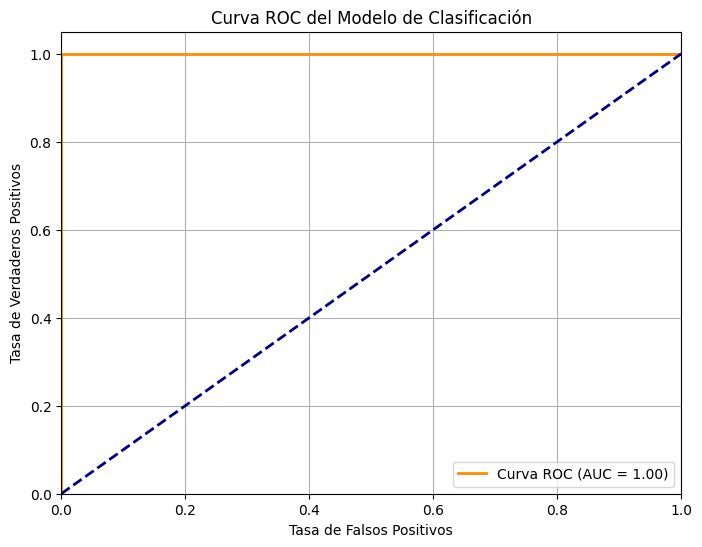

In [226]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc # Import roc_curve and auc

# Convertir los resultados de predicción a Pandas DataFrame
preds_pd = predictions.select("label", "probability").toPandas()

# Extraer la probabilidad de la clase 1 (probability es un DenseVector)
y_true = preds_pd["label"]
y_scores = preds_pd["probability"].apply(lambda x: float(x[1]))

# Calcular puntos para la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Dibujar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC del Modelo de Clasificación')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

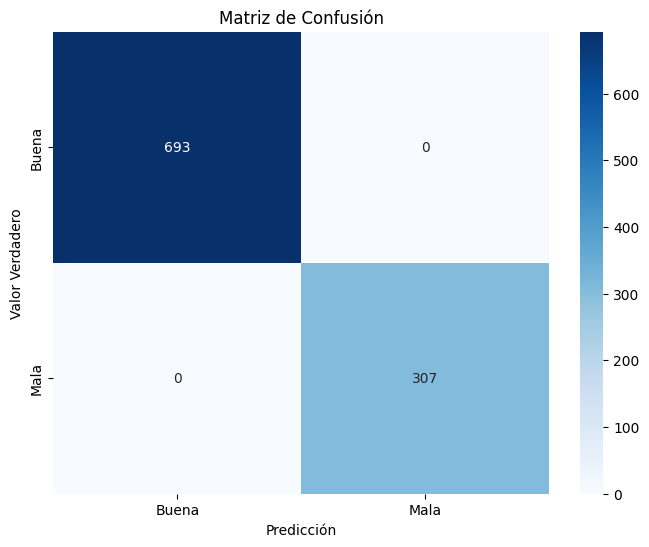

In [227]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener las predicciones y las etiquetas verdaderas
y_pred = predictions.select("prediction").collect()
y_true = predictions.select("label").collect()

# Convertir a listas planas
y_pred = [row.prediction for row in y_pred]
y_true = [row.label for row in y_true]

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Buena", "Mala"], yticklabels=["Buena", "Mala"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor Verdadero")
plt.show()


In [228]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Evaluador binario para AUC y ROC
binary_evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")

# Evaluadores múltiples para métricas estándar
precision_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="precisionByLabel")
recall_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="recallByLabel")
f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")

# Calcular métricas
precision = precision_evaluator.evaluate(predictions)
recall = recall_evaluator.evaluate(predictions)
f1 = f1_evaluator.evaluate(predictions)
accuracy = accuracy_evaluator.evaluate(predictions)
auc = binary_evaluator.evaluate(predictions)

print(f" Precisión: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")
print(f" Accuracy: {accuracy:.4f}")
print(f" Área bajo la curva (AUC - ROC): {auc:.4f}")

 Precisión: 1.0000
 Recall: 1.0000
 F1 Score: 1.0000
 Accuracy: 1.0000
 Área bajo la curva (AUC - ROC): 1.0000


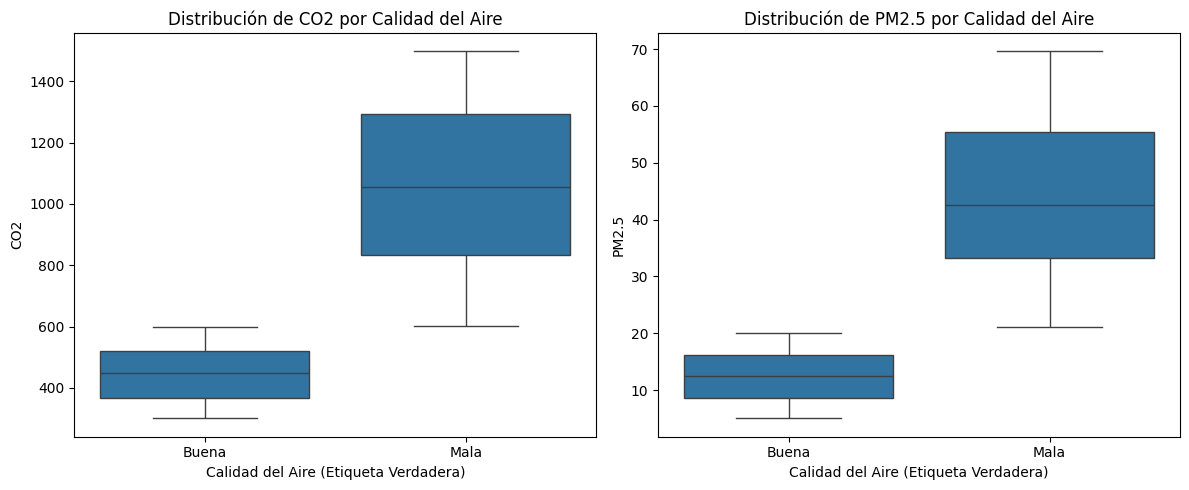

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convertir las columnas necesarias a Pandas DataFrame para visualización con seaborn
predictions_pd_for_plot = predictions.select("label", "CO2", "PM2_5").toPandas()

# Visualización de la distribución de CO2 y PM2.5 por clase
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='label', y='CO2', data=predictions_pd_for_plot)
plt.title('Distribución de CO2 por Calidad del Aire')
plt.xlabel('Calidad del Aire (Etiqueta Verdadera)')
plt.ylabel('CO2')
plt.xticks([0, 1], ['Buena', 'Mala'])


plt.subplot(1, 2, 2)
sns.boxplot(x='label', y='PM2_5', data=predictions_pd_for_plot)
plt.title('Distribución de PM2.5 por Calidad del Aire')
plt.xlabel('Calidad del Aire (Etiqueta Verdadera)')
plt.ylabel('PM2.5')
plt.xticks([0, 1], ['Buena', 'Mala'])


plt.tight_layout()
plt.show()

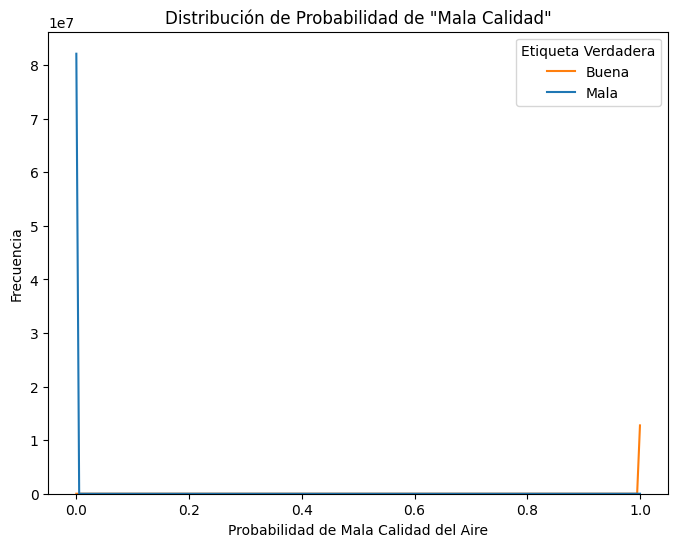

In [230]:

# Visualización de la distribución de probabilidades
predictions_pd_prob = predictions.select("label", "probability").toPandas()
predictions_pd_prob['prob_mala_calidad'] = predictions_pd_prob['probability'].apply(lambda x: float(x[1]))

plt.figure(figsize=(8, 6))
sns.histplot(data=predictions_pd_prob, x='prob_mala_calidad', hue='label', kde=True, bins=30)
plt.title('Distribución de Probabilidad de "Mala Calidad"')
plt.xlabel('Probabilidad de Mala Calidad del Aire')
plt.ylabel('Frecuencia')
plt.legend(title='Etiqueta Verdadera', labels=['Buena', 'Mala'])
plt.show()


Fase 2: Preparación de los datos para streaming

In [231]:
# Crear un directorio para los datos de streaming
generated_dir = "/content/generated_air_quality"
stream_dir = "/content/stream_air_quality"
os.makedirs(generated_dir, exist_ok=True)
os.makedirs(stream_dir, exist_ok=True)

# Generar datos ficticios para el streaming
# Generar 1000 registros divididos en 20 archivos
streaming_data = generate_air_quality_data(1000)


# Dividir los datos en 20 archivos
chunk_size = len(streaming_data) // 20

for i in range(20):
    chunk = streaming_data[i * chunk_size : (i + 1) * chunk_size]
    df_chunk = pd.DataFrame(chunk, columns=["CO2", "PM2_5", "Temperatura", "Humedad", "label"])
    df_chunk.to_csv(f"{generated_dir}/air_quality_part_{i:02d}.csv", index=False)

print("Archivos simulados creados en carpeta intermedia.")



Archivos simulados creados en carpeta intermedia.


Fase 3: Creación de la fuente de streaming y transformación con el modelo

In [232]:

# Crear la fuente de datos para el stream

stream_df = spark.readStream \
    .schema(schema_air) \
    .option("maxFilesPerTrigger", 1) \
    .option("header", True) \
    .csv(stream_dir)

display(stream_df)
# Ensamblar características para el stream
stream_features = assembler.transform(stream_df)
print(stream_features.printSchema())
stream_predictions = model.transform(stream_features)
print(stream_predictions.printSchema())
print("Stream creado correctamente.")


DataFrame[CO2: double, PM2_5: double, Temperatura: double, Humedad: double, label: int]

root
 |-- CO2: double (nullable = true)
 |-- PM2_5: double (nullable = true)
 |-- Temperatura: double (nullable = true)
 |-- Humedad: double (nullable = true)
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)

None
root
 |-- CO2: double (nullable = true)
 |-- PM2_5: double (nullable = true)
 |-- Temperatura: double (nullable = true)
 |-- Humedad: double (nullable = true)
 |-- label: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)

None
Stream creado correctamente.


In [233]:
display(stream_features)

DataFrame[CO2: double, PM2_5: double, Temperatura: double, Humedad: double, label: int, features: vector]

In [234]:
display(stream_predictions)

DataFrame[CO2: double, PM2_5: double, Temperatura: double, Humedad: double, label: int, features: vector, rawPrediction: vector, probability: vector, prediction: double]

Fase 4: Implementación de una Consulta adicional

In [235]:
# Crear una segunda consulta sobre el stream resultante
query = stream_predictions.writeStream \
    .format("memory") \
    .queryName("calidadAireClassification") \
    .outputMode("append") \
    .start()

print("Streaming iniciado...")

Streaming iniciado...


In [236]:
#Simular llegada progresiva
for i in range(20):
    src = f"{generated_dir}/air_quality_part_{i:02d}.csv"
    dst = f"{stream_dir}/air_quality_part_{i:02d}.csv"
    shutil.copy(src, dst)
    print(f"Archivo {i:02d} copiado al stream.")
    time.sleep(1)  # Espera entre archivos

# Esperar a que se procesen algunos lotes
time.sleep(20)

Archivo 00 copiado al stream.
Archivo 01 copiado al stream.
Archivo 02 copiado al stream.
Archivo 03 copiado al stream.
Archivo 04 copiado al stream.
Archivo 05 copiado al stream.
Archivo 06 copiado al stream.
Archivo 07 copiado al stream.
Archivo 08 copiado al stream.
Archivo 09 copiado al stream.
Archivo 10 copiado al stream.
Archivo 11 copiado al stream.
Archivo 12 copiado al stream.
Archivo 13 copiado al stream.
Archivo 14 copiado al stream.
Archivo 15 copiado al stream.
Archivo 16 copiado al stream.
Archivo 17 copiado al stream.
Archivo 18 copiado al stream.
Archivo 19 copiado al stream.


Fase 5: Evaluación del Modelo en streaming


In [237]:
df_query = spark.sql("SELECT * FROM calidadAireClassification")
while df_query.count() == 0:
    print("⏳ Esperando datos en memoria...")
    time.sleep(5)
    df_query = spark.sql("SELECT * FROM calidadAireClassification")
display(df_query.show(5))

+------------------+------------------+------------------+------------------+-----+--------------------+--------------------+--------------------+----------+
|               CO2|             PM2_5|       Temperatura|           Humedad|label|            features|       rawPrediction|         probability|prediction|
+------------------+------------------+------------------+------------------+-----+--------------------+--------------------+--------------------+----------+
| 585.4579379196131|  6.23424040647702|19.184117372528426| 47.16327217364186|    0|[585.457937919613...|[48.1331373694015...|           [1.0,0.0]|       0.0|
| 499.6034675691298|17.538789469029894|15.392777130586936|51.642770671669886|    0|[499.603467569129...|[26.0823343731548...|[0.99999999999529...|       0.0|
| 453.1178034028627| 9.617708898511529|17.063116293819395| 49.41191228022153|    0|[453.117803402862...|[48.7169579640766...|           [1.0,0.0]|       0.0|
| 343.0822661596944|11.878648457358556|16.2830460395

None

In [238]:
print(f"Datos disponibles: {df_query.count()} filas.")

# Crear el evaluador
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(df_query)
print(f"Accuracy del modelo en streaming: {accuracy:.4f}")
#

Datos disponibles: 1000 filas.
Accuracy del modelo en streaming: 1.0000


In [239]:

# Detener las consultas de streaming
query.stop()
spark.stop()
print("Stream detenido y Spark finalizado.")

Stream detenido y Spark finalizado.
